In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import numba
import uproot 
#plt.style.use(hep.style.CMS)

In [2]:
redirector = {"hdfs":"/hdfs",
              "local":"",
              "global":"root://cms-xrd-global.cern.ch//",
              "infn":"root://xrootd-cms.infn.it//",
              "fermilab":"root://cmsxrootd.fnal.gov//",
             }
file = "/store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/10000/0EE0D641-EDAE-D547-ABAD-56D54B768C5B.root"
local_file = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
filename= redirector["local"] + local_file

In [3]:
events = NanoEventsFactory.from_root(
    filename,
    schemaclass = NanoAODSchema.v7,
    metadata = {"Dataset":"HiggsTobbbarZprimeBaryonic","isMC":True},
    #entry_stop=10e5 ,
).events()
print("Number of events loaded : ", len(events))

Number of events loaded :  297347


Text(0.5, 1.0, '2D Histogram')

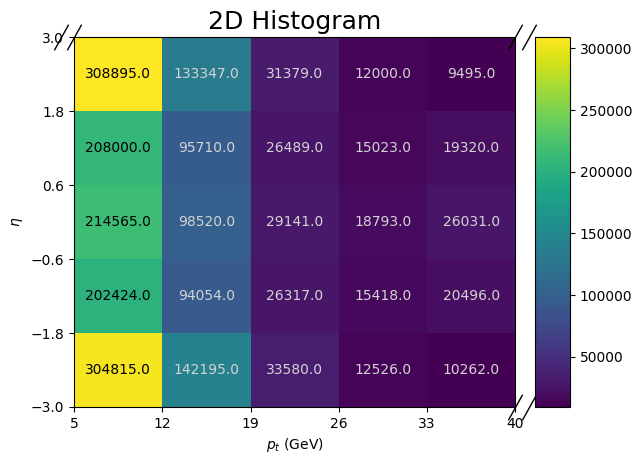

In [4]:
# Make a 2d histogram

eta_hist = hist.axis.Regular(5,-3,3, name= "eta", label="$\eta$")
pt_hist = hist.axis.Regular(5,5,40, name="pt", label="$p_t$ (GeV)")
twoDhist= hist.Hist(pt_hist , eta_hist )
twoDhist.fill(eta = ak.flatten(events.Jet.eta) , pt = ak.flatten(events.Jet.pt)) 
fig , ax = plt.subplots()
hep.hist2dplot(twoDhist, labels=True, ax=ax)
ax.set_title("2D Histogram" , size = 18)

`ak.broadcast_arrays` : This function returns the input arrays with enough elements duplicated that they can be combined element-by-element.

In [5]:
a = ak.Array([1,2,[3 ,4 ]])
print("a= ", a)
b = ak.Array([[5,2,],6,7])
print("b= ", b)
c = ak.broadcast_arrays(a,b)
print("c= ", c)

a=  [1, 2, [3, 4]]
b=  [[5, 2], 6, 7]
c=  [<Array [[1, 1], 2, [3, 4]] type='3 * union[var * int64, int64]'>, <Array [[5, 2], 6, [7, 7]] type='3 * union[var * int64, int64]'>]


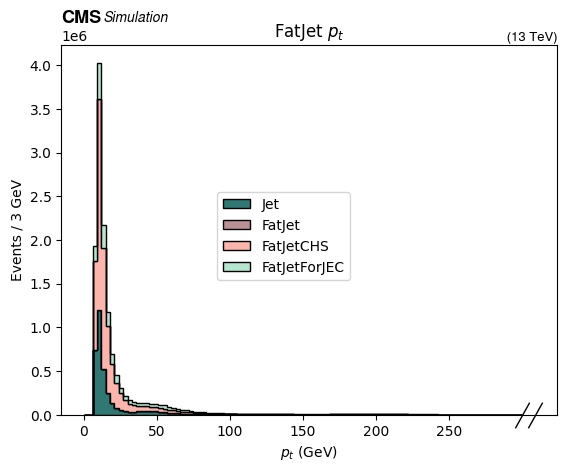

In [6]:
fatjet_hist = (
    hist.Hist.new
    .StrCat(["Jet","FatJet","FatJetCHS","FatJetForJEC"], name="jet", label="Jets")
    .Regular(100,0,300,name="pt")
    .Double()
    )
fatjet_hist.fill(jet="Jet", pt= ak.flatten(events.Jet.pt) )
fatjet_hist.fill(jet="FatJet", pt= ak.flatten(events.FatJet.pt) )
fatjet_hist.fill(jet="FatJetCHS", pt= ak.flatten(events.FatJetCHS.pt) )
fatjet_hist.fill(jet="FatJetForJEC", pt= ak.flatten(events.FatJetForJEC.pt) )
hists= [ fatjet_hist["Jet", :], fatjet_hist["FatJet", :] ,fatjet_hist["FatJetCHS", :], fatjet_hist["FatJetForJEC", :] ]
fig , ax = plt.subplots()
fill_colors = ["#317773" , "#B99095", "#FCB5AC", "#B5E5CF"]
labels =["Jet","FatJet","FatJetCHS","FatJetForJEC"]
hep.histplot(
    hists ,
    histtype="fill",
    color = fill_colors,
    edgecolor="black",
    label=labels,
    stack=True ,
    lw=1,
    ax=ax
)
ax.set_title("FatJet $p_t$")
hep.cms.label("", pad=0.05)
fig.legend(loc = 10)
ax.set_xlabel("$p_t$ (GeV)")
ax.set_ylabel("Events / 3 GeV")
ax.set_xticks(np.arange(0,300,50))

In [7]:
events.fields

['SoftActivityJet',
 'SV',
 'FsrPhoton',
 'JetCalo',
 'SoftActivityJetHT5',
 'L1',
 'L1PreFiringWeight',
 'IsoTrack',
 'Jet',
 'TrigObj',
 'L1Reco',
 'RawMET',
 'Tau',
 'SoftActivityJetHT',
 'LowPtElectron',
 'SoftActivityJetNjets2',
 'luminosityBlock',
 'CaloMET',
 'DeepMETResponseTune',
 'fixedGridRhoFastjetAll',
 'fixedGridRhoFastjetCentralCalo',
 'Flag',
 'JetPuppi',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'Muon',
 'HLT',
 'HLTriggerFirstPath',
 'PuppiMET',
 'fixedGridRhoFastjetCentralNeutral',
 'Proton',
 'fixedGridRhoFastjetCentral',
 'SoftActivityJetNjets10',
 'TkMET',
 'SoftActivityJetHT10',
 'PV',
 'SoftActivityJetHT2',
 'ChsMET',
 'DeepMETResolutionTune',
 'Electron',
 'FatJet',
 'SoftActivityJetNjets5',
 'RawPuppiMET',
 'Photon',
 'boostedTau',
 'PPSLocalTrack',
 'SubJet',
 'event',
 'CorrT1METJet',
 'run',
 'FatJetForJEC',
 'FatJetCHS',
 'MET',
 'OtherPV',
 'HLTriggerFinalPath']

In [8]:
events.HLT.fields

['AK8PFJet360_TrimMass30',
 'AK8PFJet380_TrimMass30',
 'AK8PFJet400_TrimMass30',
 'AK8PFJet420_TrimMass30',
 'AK8PFHT750_TrimMass50',
 'AK8PFHT800_TrimMass50',
 'AK8PFHT850_TrimMass50',
 'AK8PFHT900_TrimMass50',
 'CaloJet500_NoJetID',
 'CaloJet550_NoJetID',
 'Trimuon5_3p5_2_Upsilon_Muon',
 'DoubleEle25_CaloIdL_MW',
 'DoubleEle27_CaloIdL_MW',
 'DoubleEle33_CaloIdL_MW',
 'DoubleEle24_eta2p1_WPTight_Gsf',
 'DoubleEle8_CaloIdM_TrackIdM_Mass8_DZ_PFHT350',
 'DoubleEle8_CaloIdM_TrackIdM_Mass8_PFHT350',
 'Ele27_Ele37_CaloIdL_MW',
 'Mu27_Ele37_CaloIdL_MW',
 'Mu37_Ele27_CaloIdL_MW',
 'Mu37_TkMu27',
 'DoubleMu4_3_Bs',
 'DoubleMu4_3_Jpsi_Displaced',
 'DoubleMu4_JpsiTrk_Displaced',
 'DoubleMu4_LowMassNonResonantTrk_Displaced',
 'DoubleMu3_Trk_Tau3mu',
 'DoubleMu4_PsiPrimeTrk_Displaced',
 'DoubleMu4_Mass8_DZ_PFHT350',
 'DoubleMu8_Mass8_PFHT350',
 'Mu3_PFJet40',
 'Mu7p5_L2Mu2_Jpsi',
 'Mu7p5_L2Mu2_Upsilon',
 'Mu7p5_Track2_Jpsi',
 'Mu7p5_Track3p5_Jpsi',
 'Mu7p5_Track7_Jpsi',
 'Mu7p5_Track2_Upsilon',
 '

In [9]:
for field in events.HLT.fields :
    if field.startswith("Ele32") :
        print(field)

Ele32_WPTight_Gsf
Ele32_WPTight_Gsf_L1DoubleEG


In [10]:
print("Total events : ", len(events))
print("No. of events after PFMETNoMu120_PFMHTNoMu120_IDTight : " , len(events[events.HLT.PFMETNoMu120_PFMHTNoMu120_IDTight]))
print("No. of events after  Ele32_WPTight_Gsf: " , len(events[~events.HLT.Ele32_WPTight_Gsf]))

Total events :  297347
No. of events after PFMETNoMu120_PFMHTNoMu120_IDTight :  549
No. of events after  Ele32_WPTight_Gsf:  98961


In [11]:
from monoHbbtools.Utilities import condor